In [2]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

c:\Users\mail2\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df=pd.read_csv(r"C:\Users\mail2\Desktop\ml\archive (1)\heart.csv")

df2=df.copy()
del df2['output']
y,x=df[df.columns[-1]],df2

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [14]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [16]:
import shap
explainer = shap.Explainer(model.predict, xtest)
shap_values = explainer(xtest)

Permutation explainer: 62it [00:15,  1.88it/s]                        


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


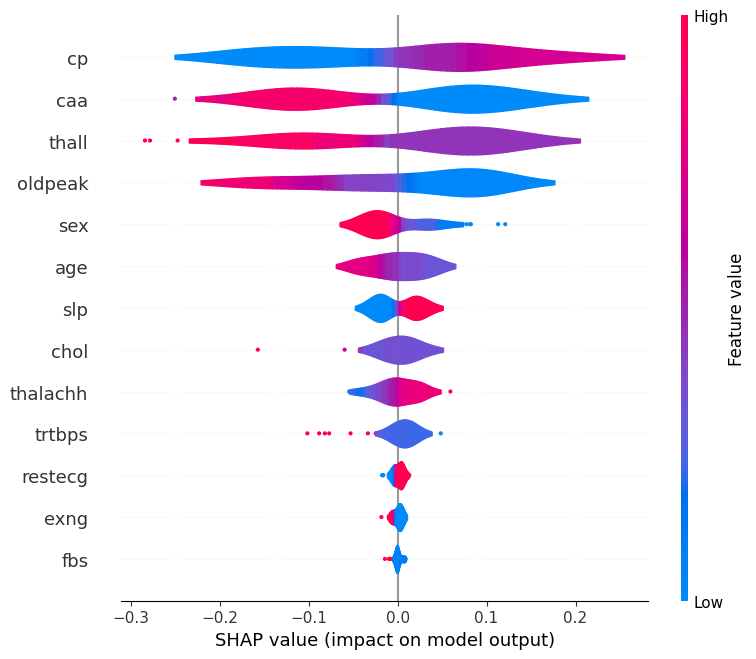

In [18]:
shap.summary_plot(shap_values,plot_type='violin')

In [22]:
import numpy as np
pred=model.predict(xtest)
pred = np.where(pred<0.5, 0,1)

<AxesSubplot: >

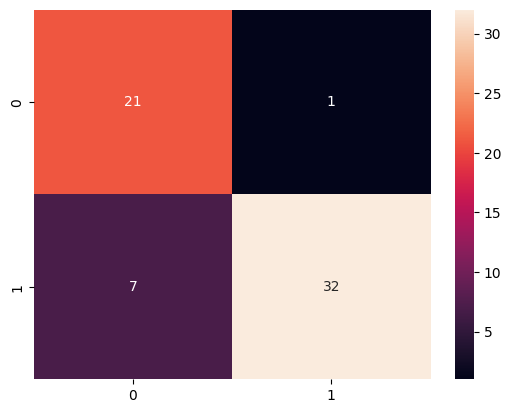

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
res = confusion_matrix(pred,ytest)
sns.heatmap(res, annot=True)